# Import

In [43]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

# Ingestion

In [2]:
facebook_raw = pd.read_csv(r'F:\For work\Data set\dataset_facebook-comments-scraper_2024-06-11_04-11-23-243 (1).csv')
print(facebook_raw.shape)

(785, 22)


<Axes: >

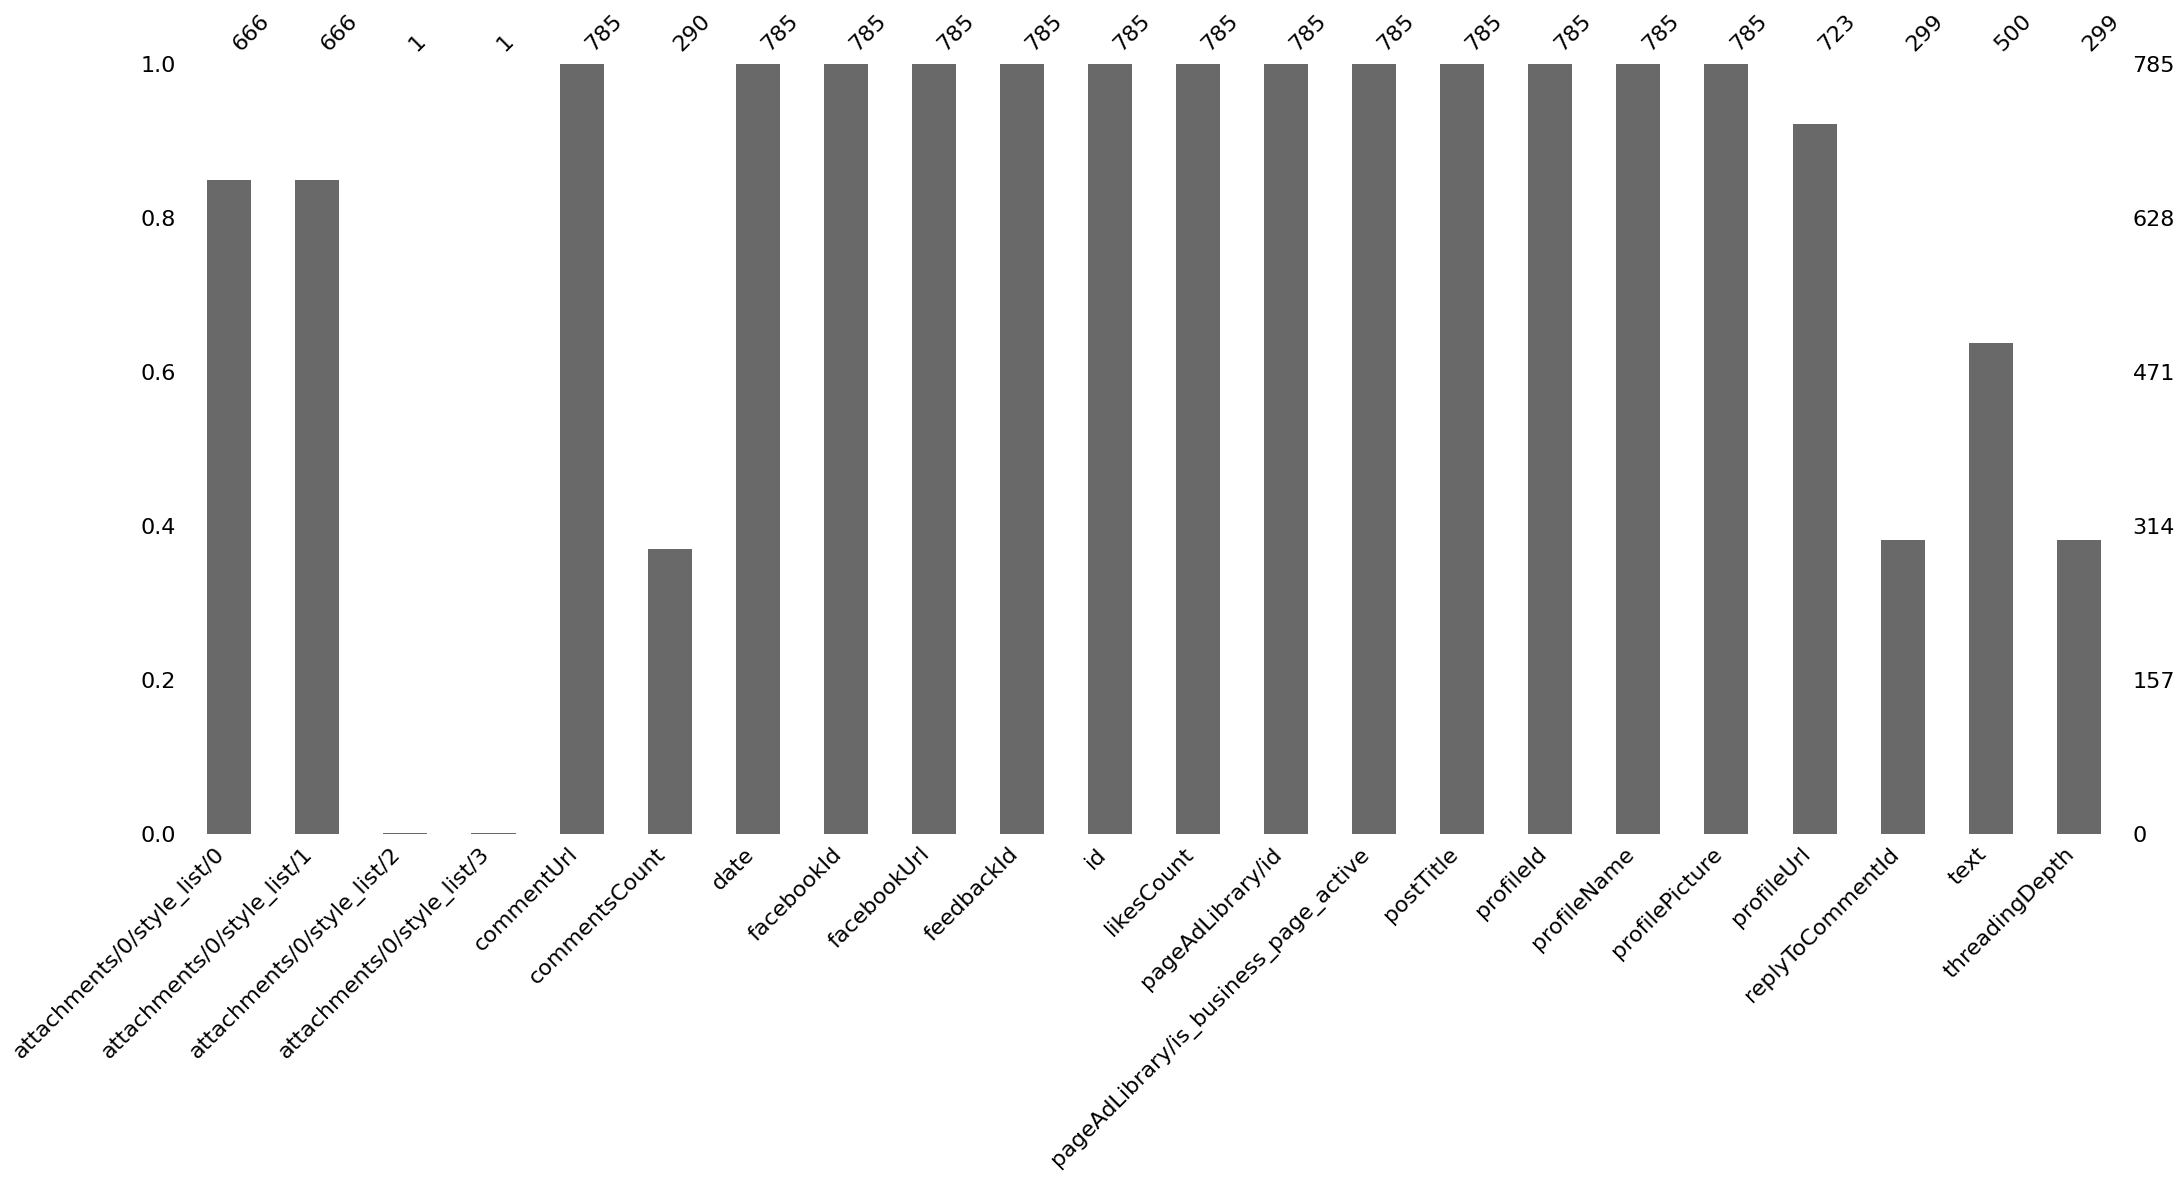

In [3]:
msno.bar(facebook_raw)

# EDA

## We can't see the distribution of date so we have to convert date to datetime object to visualize the 'date' distribution, this are still in EDA process

In [5]:
from datetime import datetime

def convert_date_and_time(column):
    # Convert date column to datetime
    facebook_raw[column] = pd.to_datetime(facebook_raw[column], format='%Y-%m-%dT%H:%M:%S.%fZ')
    
    # Extract date part and create a new column with dates only
    facebook_raw['date_only'] = facebook_raw[column].dt.date
    
    # Extract time part and create a new column with time only
    facebook_raw['timestamp'] = facebook_raw[column].dt.strftime('%H:%M:%S')
    
    return facebook_raw

In [6]:
facebook_raw = convert_date_and_time('date')

In [7]:
facebook_raw['date_only'].value_counts()

date_only
2024-06-10    185
2024-06-09    153
2024-06-02    127
2024-06-01     59
2024-06-08     53
2024-06-07     49
2024-06-03     37
2024-06-05     33
2024-06-06     26
2024-05-31     25
2024-06-04     24
2024-05-29      8
2024-05-30      6
Name: count, dtype: int64

In [8]:
facebook_raw['timestamp'].value_counts()

timestamp
14:35:13    2
13:02:02    2
09:12:55    1
21:44:32    1
15:40:01    1
           ..
07:25:08    1
10:51:40    1
08:09:21    1
08:00:50    1
21:35:26    1
Name: count, Length: 783, dtype: int64

In [9]:
# Drop the original date column
facebook_raw = facebook_raw.drop('date', axis=1)

facebook_raw.rename(columns={'date_only': 'date'}, inplace=True)

In [10]:
facebook_raw.head()

attachments/0/style_list/0 attachments/0/style_list/1  \
0                      photo                   fallback   
1               video_inline                      video   
2                      photo                   fallback   
3                        NaN                        NaN   
4                        NaN                        NaN   

  attachments/0/style_list/2 attachments/0/style_list/3  \
0                        NaN                        NaN   
1                  games_app                   fallback   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

                                          commentUrl  commentsCount  \
0  https://www.facebook.com/TOJONews/posts/pfbid0...            1.0   
1  https://www.facebook.com/TOJONews/posts/pfbid0...            NaN   
2  https://www.facebook.com/TOJONews/posts/pfbid0...            1.0   
3  https://www.facebook.com/TOJONews/posts/pfbid0...            1.0   
4  https://www.facebook.com/TOJONews/posts/pfbid0...            NaN   

        facebookId                                        facebookUrl  \
0  869328301881125  https://www.facebook.com/TOJONews/posts/pfbid0...   
1  869328301881125  https://www.facebook.com/TOJONews/posts/pfbid0...   
2  869328301881125  https://www.facebook.com/TOJONews/posts/pfbid0...   
3  869328301881125  https://www.facebook.com/TOJONews/posts/pfbid0...   
4  869328301881125  https://www.facebook.com/TOJONews/posts/pfbid0...   

                                          feedbackId  \
0  ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzQzNDg4NzIwNj...   
1  ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzMwMjI2NDQ4Mj...   
2  ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzExNTEzNjM5MT...   
3  ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1XzIxODU0OTMyMD...   
4  ZmVlZGJhY2s6ODY5MzI4MzAxODgxMTI1Xzk5NjE2MTM5NT...   

                                                  id  likesCount  \
0  Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfNDM0ODg3MjA2MD...          14   
1  Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfMzAyMjY0NDgyOT...           7   
2  Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfMTE1MTM2MzkxNj...           0   
3  Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfMjE4NTQ5MzIwMT...           1   
4  Y29tbWVudDo4NjkzMjgzMDE4ODExMjVfOTk2MTYxMzk1ND...           0   

   pageAdLibrary/id  pageAdLibrary/is_business_page_active  \
0   100663921489162                                  False   
1   100663921489162                                  False   
2   100663921489162                                  False   
3   100663921489162                                  False   
4   100663921489162                                  False   

                                           postTitle        profileId  \
0  üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  100064118881354   
1  üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  100064118881354   
2  üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  100000252273736   
3  üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...       1220677411   
4  üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  100000700855252   

             profileName                                     profilePicture  \
0              TOJO News  https://scontent.fdac31-1.fna.fbcdn.net/v/t39....   
1              TOJO News  https://scontent.fdac31-1.fna.fbcdn.net/v/t39....   
2              Daeng Kku  https://scontent.fdac31-1.fna.fbcdn.net/v/t39....   
3  Nu Earn Jieamjindarat  https://scontent.fdac31-2.fna.fbcdn.net/v/t39....   
4        ‡∏î‡∏ô‡∏∏‡∏û‡∏á‡∏©‡πå ‡∏Å‡∏•‡

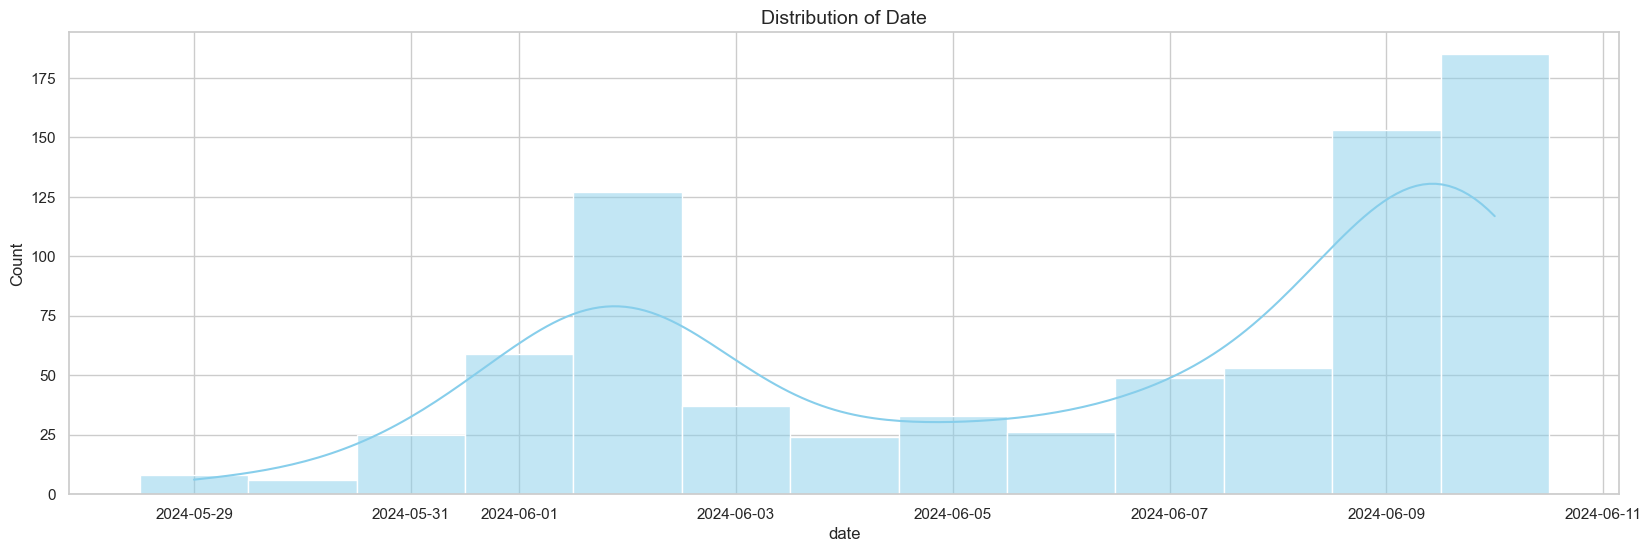

In [12]:
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(1, 1, figsize = (20, 6))

sns.histplot(facebook_raw['date'], kde = True, color = 'skyblue', ax = ax)

#Set the title for each plot
ax.set_title('Distribution of Date', fontsize = 14)

plt.show()

In [19]:
facebook_raw['profileName'].value_counts()

profileName
Veerawat Tangsrad           5
‡∏™‡∏°‡∏®‡∏±‡∏Å‡∏î‡∏¥‡πå ‡∏™‡∏¥‡∏ô‡∏ô‡∏¥‡∏ò‡∏¥‡∏™           4
Ditthakron Nest             3
MiewOoz Jieranan            3
‡∏û‡∏¥‡∏®‡∏¥‡∏©‡∏ê ‡∏≠‡∏¥‡∏ô‡∏ó‡∏£‡∏™‡∏±‡∏á‡∏Ç‡∏ô‡∏≤‡∏ß‡∏¥‡∏ô       3
                           ..
‡∏û‡∏π‡∏•‡∏®‡∏¥‡∏£‡∏¥ ‡∏™‡∏•‡∏±‡∏Å‡∏Ñ‡∏≥              1
‡∏°‡∏≤‡∏£‡πå‡∏Ñ ‡∏ú‡∏π‡πâ‡∏Ñ‡πà‡∏≤‡∏¢‡∏±‡∏Å‡∏©‡πå           1
‡πÅ‡∏ï‡∏á‡∏´‡∏ß‡∏≤‡∏ô ‡∏ü‡∏≤‡∏á‡πÅ‡∏Å‡πâ‡∏ß             1
Pim Nilrat                  1
‡∏ô‡∏π‡πã‡∏ß‡πå ‡∏ï‡∏∏‡πâ‡∏¢‡∏ô‡∏∏‡πâ‡∏¢ ‡∏õ‡∏†‡∏≤‡∏ß‡∏£‡∏¥‡∏ô‡∏ó‡πå    1
Name: count, Length: 485, dtype: int64

In [20]:
facebook_raw['profileName'].nunique()

485

# Oberservation


1. Source of the data are from the TOJO NEWS share campaign 
2. Data are range between 2024-05-29 - 2024-06-10 == 12 days 
3. There are total of 7xx comments
4. There are 485 Unique ProfileName
4. We will do only text analysis, will skip the part of image, attachment analysis


# Data Preprocessing

## Extract username

In [25]:
facebook_raw.columns

Index(['attachments/0/style_list/0', 'attachments/0/style_list/1',
       'attachments/0/style_list/2', 'attachments/0/style_list/3',
       'commentUrl', 'commentsCount', 'facebookId', 'facebookUrl',
       'feedbackId', 'id', 'likesCount', 'pageAdLibrary/id',
       'pageAdLibrary/is_business_page_active', 'postTitle', 'profileId',
       'profileName', 'profilePicture', 'profileUrl', 'replyToCommentId',
       'text', 'threadingDepth', 'date', 'timestamp'],
      dtype='object')

In [42]:
facebook_raw.profileUrl.value_counts()

profileUrl
https://www.facebook.com/people/Veerawat-Tangsrad/pfbid028qgiXsY1TjwmwVAboHS27A4PCYXyKxXyxzVYMXsyGrhRKjC27Yh5aubN7gGArcUvl/                                                                                                                                                                                           5
https://www.facebook.com/people/%E0%B8%AA%E0%B8%A1%E0%B8%A8%E0%B8%B1%E0%B8%81%E0%B8%94%E0%B8%B4%E0%B9%8C-%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%99%E0%B8%B4%E0%B8%98%E0%B8%B4%E0%B8%AA/pfbid0286YiKpR2kuQwdtTnTttW2oCErKQ7b65i3GRNmpDh9AmnKfaDzRCtx9AqdcNuuxyJl/                                                           4
https://www.facebook.com/kungza.hh                                                                                                                                                                                                                                                                                    3
https://www.facebook.com/aofjung2in1                 

In [37]:
#Extract username from profileUrl
facebook_raw['username'] = facebook_raw['profileUrl'].str.split('/').str[-1]

In [38]:
facebook_raw['username'].value_counts()

username
                           505
aofjung2in1                  3
ditthakron.nest.9            3
kantacha.kraisawad           3
kru.kla.5                    3
                          ... 
tonpaibook                   1
khnm.ru.67940                1
giftsawitreechaipaitoon      1
koy.tualek                   1
mam.mahaudom                 1
Name: count, Length: 142, dtype: int64

In [44]:
#Replace 'None' with NaN
facebook_raw['username'] = facebook_raw['username'].replace('None', np.nan)

In [46]:
facebook_raw.columns

Index(['attachments/0/style_list/0', 'attachments/0/style_list/1',
       'attachments/0/style_list/2', 'attachments/0/style_list/3',
       'commentUrl', 'commentsCount', 'facebookId', 'facebookUrl',
       'feedbackId', 'id', 'likesCount', 'pageAdLibrary/id',
       'pageAdLibrary/is_business_page_active', 'postTitle', 'profileId',
       'profileName', 'profilePicture', 'profileUrl', 'replyToCommentId',
       'text', 'threadingDepth', 'date', 'timestamp', 'username'],
      dtype='object')

In [50]:
facebook_raw.profileId.value_counts()

profileId
pfbid028qgiXsY1TjwmwVAboHS27A4PCYXyKxXyxzVYMXsyGrhRKjC27Yh5aubN7gGArcUvl    5
pfbid0286YiKpR2kuQwdtTnTttW2oCErKQ7b65i3GRNmpDh9AmnKfaDzRCtx9AqdcNuuxyJl    4
pfbid0U9RBu3jRU66zvzmNGgqf9xVLU29qnAoN9HeJCucLTXw2xTtbcbbaThTBy9KASgUNl     3
pfbid0yPT5RF8HD3Xvm71PuK2yqF4YDwGNQHtDCE5LqxpRk4QeJkRg2s4XFpGbDq9hqY5Ml     3
pfbid0uRzx9SRnhiSosXef1iKcm7L4DMLjrMdzHqovNPyNZ3ALKssuVuNsYgzHd24BQUrDl     3
                                                                           ..
pfbid0nfVtM3un98LZFshZkNeksbGWaRa7eMchWvMWLkkzWQytNyF4PhoZ2F8pxRKovTGEl     1
pfbid0FTLkMqBLRCRZ8xDA8sT5xZkiTrfHXTjrqEGER7fugspvKcr57b8YhCfT3g389dHzl     1
pfbid0BQ6uoHUni2djDoVNnvbDd5QM1yW9yqybSyYwkk6u51b5mui3inL7bqnhKdtMJrnVl     1
pfbid02WujiPLnQtArWpUxhSsaqXHJUyhJjMUFpLZye2GYV5Eb4Uqm7M6o8QMycE8XaBCyol    1
pfbid02DC52CEjAvUZEhp7vJEPsntJ4Wv1UNpZr7aH2xu1BVmTNWJsoSrP1Q3UY1BFnPXFdl    1
Name: count, Length: 485, dtype: int64

In [51]:
#Filtered facebook_raw to include only column we need for text analysis

#Lowercase all columns name
facebook_raw.columns = facebook_raw.columns.str.lower()

facebook = facebook_raw[['profileid', 'profilename', 'username', 'profileurl', 'text', 'posttitle', 'date', 'timestamp']]

In [52]:
facebook

profileid  \
0                                      100064118881354   
1                                      100064118881354   
2                                      100000252273736   
3                                           1220677411   
4                                      100000700855252   
..                                                 ...   
780                                    100095146487102   
781  pfbid02LCDrqxb1XqVcqVpvxzmDAdYx1MEG6r8n8dFtzm6...   
782  pfbid0JsEKSJQ4TrWtGoGNiXgv4vsL4Lj5YPZKBTzZ1pvN...   
783  pfbid0RvmWxJeur7sMpW1P7f8dMawQgTm9hMpG2jyP8yzG...   
784  pfbid0aYJ4U5AxNNLgb1y3AcdC7k6wVkUZKoB3oYuDigEr...   

                     profilename     username  \
0                      TOJO News     TOJONews   
1                      TOJO News     TOJONews   
2                      Daeng Kku    daeng.kku   
3          Nu Earn Jieamjindarat  nuearn.jang   
4                ‡∏î‡∏ô‡∏∏‡∏û‡∏á‡∏©‡πå ‡∏Å‡∏•‡∏¥‡πà‡∏ô‡∏©‡∏£  aofjung2in1   
..                           ...          ...   
780  ‡∏°‡∏µ‡πÄ‡∏õ‡πâ‡∏≤‡∏´‡∏°‡∏≤‡∏¢ ‡∏£‡∏≠‡∏î‡∏ï‡∏≤‡∏¢‡πÉ‡∏´‡πâ‡∏ú‡πà‡∏≤‡∏ô‡∏ß‡∏±‡∏ô                
781      ‡∏£‡∏∏‡πà‡∏á‡∏£‡∏±‡∏™‡∏£‡∏≤ ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏ò‡∏ô‡∏≤‡∏ô‡∏∏‡∏Å‡∏¥‡∏à          NaN   
782                    Sazzy Kae    kaeya.chu   
783                 ‡∏ä‡∏≤‡πÄ‡∏ô‡∏¢ ‡∏ä‡∏ç‡∏≤‡∏ô‡∏∏‡∏ä                
784                    ‡∏™‡∏≠‡∏á ‡∏≠‡∏ß‡∏Å‡∏≤‡∏®                

                                            profileurl  \
0                    https://www.facebook.com/TOJONews   
1                    https://www.facebook.com/TOJONews   
2                   https://www.facebook.com/daeng.kku   
3                 https://www.facebook.com/nuearn.jang   
4                 https://www.facebook.com/aofjung2in1   
..                                                 ...   
780  https://www.facebook.com/people/%E0%B8%A1%E0%B...   
781                                                NaN   
782                 https://www.facebook.com/kaeya.chu   
783  https://www.facebook.com/people/%E0%B8%8A%E0%B...   
784  https://www.facebook.com/people/%E0%B8%AA%E0%B...   

                                                  text  \
0    ‡πÅ‡∏≠‡∏î‡∏°‡∏¥‡∏ô‡πÉ‡∏à‡∏î‡∏µ‡πÉ‡∏ö‡πâ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÉ‡∏´‡πâ‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô‡∏ô‡∏∞‡∏Ñ‡∏∞ ü§≠ ‡∏°‡∏µ‡πÉ‡∏Ñ‡∏£‡∏ó‡∏≤‡∏¢‡∏ñ‡∏π‡∏Å‡πÑ‡∏´...   
1    ‡∏ô‡∏±‡∏ö‡∏ñ‡∏≠‡∏¢‡∏´‡∏•‡∏±‡∏á 4 ‡∏ß‡∏±‡∏ô ‡πÅ‡∏≠‡∏î‡∏°‡∏¥‡∏ô‡∏°‡∏µ‡∏Ñ‡∏≥‡πÉ‡∏ö‡πâ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏°‡∏≤‡πÉ‡∏´‡πâ‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô‡∏Å...   
2    ‡∏£‡πà‡∏ß‡∏°‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°\n‡πÇ‡∏à‡∏≠‡∏µ‡πâ ‡∏†‡∏π‡∏ß‡∏®‡∏¥‡∏©‡∏ê‡πå‚Äã  ‡∏≠‡∏ô‡∏±‡∏ô‡∏ï‡πå‡∏û‡∏£‡∏™‡∏¥‡∏£‡∏¥\nDa...   
3    ‡∏ô‡∏∏‡πä‡∏Å ‡∏ò‡∏ô‡∏î‡∏•\n‡∏à‡∏±‡∏ô‡∏ó‡∏£‡πå‡πÄ‡∏û‡πá‡∏ç ‡πÄ‡∏û‡πá‡∏ç Aou Kub  Monvipa U-...   
4    ‡∏≠‡∏≤‡∏£‡πå  ‡πÄ‡∏î‡∏≠‡∏∞‡∏™‡∏ï‡∏≤‡∏£‡πå‡∏Ñ‡πà‡∏∞ (‡∏≠‡∏≤‡∏ì‡∏±‡∏ï‡∏û‡∏• ‡∏®‡∏¥‡∏£‡∏¥‡∏ä‡∏∏‡∏°‡πÅ‡∏™‡∏á) Amarit...   
..                                                 ...   
780                                                NaN   
781                                                NaN   
782                                                NaN   
783                                                NaN   
784                                                NaN   

                                             posttitle        date timestamp  
0    üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  2024-06-05  09:12:55  
1    üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  2024-06-06  08:54:17  
2    üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  2024-06-10  09:05:00  
3    üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  2024-05-30  09:30:41  
4    üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡

In [56]:
#Exclude rows with missing text
facebook = facebook[facebook['text'].notna()]
facebook.shape

(500, 8)

In [60]:
#Exclude admin messages
facebook = facebook[facebook['username'] != 'TOJONews']

In [61]:
facebook

profileid  \
2                                      100000252273736   
3                                           1220677411   
4                                      100000700855252   
5    pfbid0cRiwUP4ESAwiMJZTpjf61qEe4qU9FkuiSwwX4s7k...   
6    pfbid0286YiKpR2kuQwdtTnTttW2oCErKQ7b65i3GRNmpD...   
..                                                 ...   
745  pfbid035QGS4aVNq3ZakCrKX3t9Aq6yAFdgFiiCKnbsgDu...   
746  pfbid0Ron8TLMLS26LtRHk6Qt5N59nMp84V54A9sXDj8xr...   
747  pfbid02JM62K9C6oPQBkn1wNnJgCGb9Ujcizr2iDEHTYVp...   
748  pfbid0BdeNhehwfaLyuL55s4pKWJmLMjFK8woAL3iDo5jr...   
749  pfbid02DC52CEjAvUZEhp7vJEPsntJ4Wv1UNpZr7aH2xu1...   

                  profilename                        username  \
2                   Daeng Kku                       daeng.kku   
3       Nu Earn Jieamjindarat                     nuearn.jang   
4             ‡∏î‡∏ô‡∏∏‡∏û‡∏á‡∏©‡πå ‡∏Å‡∏•‡∏¥‡πà‡∏ô‡∏©‡∏£                     aofjung2in1   
5        Sasiwimon Puachaisri                  bowi.sasiwimom   
6           ‡∏™‡∏°‡∏®‡∏±‡∏Å‡∏î‡∏¥‡πå ‡∏™‡∏¥‡∏ô‡∏ô‡∏¥‡∏ò‡∏¥‡∏™                                   
..                        ...                             ...   
745             Wannaporn Lee                    novey.varitt   
746            Puy Nittaya Ja              puynittaya.kanavan   
747                   Ai Riin                             NaN   
748        Twinbee Blacklabel  suwantoonbodyslamtg88888888888   
749  ‡∏ô‡∏π‡πã‡∏ß‡πå ‡∏ï‡∏∏‡πâ‡∏¢‡∏ô‡∏∏‡πâ‡∏¢ ‡∏õ‡∏†‡∏≤‡∏ß‡∏£‡∏¥‡∏ô‡∏ó‡πå                                   

                                            profileurl  \
2                   https://www.facebook.com/daeng.kku   
3                 https://www.facebook.com/nuearn.jang   
4                 https://www.facebook.com/aofjung2in1   
5              https://www.facebook.com/bowi.sasiwimom   
6    https://www.facebook.com/people/%E0%B8%AA%E0%B...   
..                                                 ...   
745              https://www.facebook.com/novey.varitt   
746        https://www.facebook.com/puynittaya.kanavan   
747                                                NaN   
748  https://www.facebook.com/suwantoonbodyslamtg88...   
749  https://www.facebook.com/people/%E0%B8%99%E0%B...   

                                                  text  \
2    ‡∏£‡πà‡∏ß‡∏°‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°\n‡πÇ‡∏à‡∏≠‡∏µ‡πâ ‡∏†‡∏π‡∏ß‡∏®‡∏¥‡∏©‡∏ê‡πå‚Äã  ‡∏≠‡∏ô‡∏±‡∏ô‡∏ï‡πå‡∏û‡∏£‡∏™‡∏¥‡∏£‡∏¥\nDa...   
3    ‡∏ô‡∏∏‡πä‡∏Å ‡∏ò‡∏ô‡∏î‡∏•\n‡∏à‡∏±‡∏ô‡∏ó‡∏£‡πå‡πÄ‡∏û‡πá‡∏ç ‡πÄ‡∏û‡πá‡∏ç Aou Kub  Monvipa U-...   
4    ‡∏≠‡∏≤‡∏£‡πå  ‡πÄ‡∏î‡∏≠‡∏∞‡∏™‡∏ï‡∏≤‡∏£‡πå‡∏Ñ‡πà‡∏∞ (‡∏≠‡∏≤‡∏ì‡∏±‡∏ï‡∏û‡∏• ‡∏®‡∏¥‡∏£‡∏¥‡∏ä‡∏∏‡∏°‡πÅ‡∏™‡∏á) Amarit...   
5    ‚ù§Ô∏è‡∏£‡πà‡∏ß‡∏°‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏Ñ‡πà‡∏∞‚ù§Ô∏è\n‡∏ï‡∏≠‡∏ö : ‡∏¢‡∏∏‡∏ó‡∏ò‡∏ô‡∏≤ ‡πÄ‡∏õ‡∏∑‡πâ‡∏≠‡∏á‡∏Å‡∏•‡∏≤‡∏á ‡∏´‡∏£...   
6    "‡πÇ‡∏à‡∏≠‡∏µ‡πâ ‡∏†‡∏π‡∏ß‡∏®‡∏¥‡∏©‡∏ê‡πå ‡∏≠‡∏ô‡∏±‡∏ô‡∏ï‡πå‡∏û‡∏£‡∏™‡∏¥‡∏£‡∏¥" ‡πÄ‡∏î‡∏≤‡∏•‡πà‡∏∞ \nBoonrat...   
..                                                 ...   
745  ‡∏ï‡∏≠‡∏ö ‡πÄ‡∏Ç‡∏ï‡∏ï‡πå ‡∏®‡∏¥‡∏£‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡πå ‡∏û‡∏±‡∏ô‡∏¢‡∏≤\nYuu Pariss \nDittha...   
746                           ‡∏ô‡∏π‡πã‡∏ß‡πå ‡∏ï‡∏∏‡πâ‡∏¢‡∏ô‡∏∏‡πâ‡∏¢ ‡∏õ‡∏†‡∏≤‡∏ß‡∏£‡∏¥‡∏ô‡∏ó‡πå   
747  ‡∏ï‡∏≠‡∏ö‡∏ß‡πà‡∏≤  ‡πÄ‡∏Ç‡∏ï‡∏ï‡πå ‡∏®‡∏¥‡∏£‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡πå ‡∏û‡∏±‡∏ô‡∏¢‡∏≤\n‡∏ö‡∏∏‡πã‡∏° ‡∏ö‡∏∏‡πã‡∏°\n‡∏†‡∏±‡∏ó‡∏£...   
748  ‡πÇ‡∏à‡∏≠‡∏µ‡πâ ‡∏†‡∏π‡∏ß‡∏®‡∏¥‡∏©‡∏ê‡πå ‡∏≠‡∏ô‡∏±‡∏ô‡∏ï‡πå‡∏û‡∏£‡∏™‡∏¥‡∏£‡∏¥\n‡∏°‡∏£ ‡πÇ‡∏®‡∏†‡∏≤ ‡∏£‡∏±‡∏ï‡∏ô‡∏≤‡∏Å‡∏π‡∏• ...   
749  ‡∏ï‡∏≠‡∏ö    ‡πÄ‡∏Ç‡∏ï‡∏ï‡πå ‡∏®‡∏¥‡∏£‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡πå ‡∏û‡∏±‡∏ô‡∏¢‡∏≤\n‡πÅ‡∏°‡πà‡∏õ‡∏∏‡πâ‡∏¢ ‡∏û‡∏µ‡πà‡∏ï‡∏∏‡πâ‡∏¢‡∏ô...   

                                             posttitle        date timestamp  
2    üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  2024-06-10  09:05:00  
3    üì£ ‡∏ó‡∏≤‡∏¢‡πÄ‡∏á‡∏≤‡∏•‡∏∏‡πâ‡∏ô‡πÄ‡∏á‡∏¥‡∏ô ‚ú® ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏¢‡∏™‡∏∏...  2024-05-30  09:30:41  
4    üì£ ‡∏ó‡∏≤‡∏¢‡